In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from sklearn import datasets
from sklearn import tree
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../data/dataset_regression.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.isnull().sum().sum()

0

In [7]:
y = df["price_usd"]
X = df.drop(["price_usd"], axis=1)

In [8]:
reg = DecisionTreeRegressor(max_depth=3)
reg.fit(X, y)

DecisionTreeRegressor(max_depth=3)

In [9]:
text_representation = tree.export_text(reg)
print(text_representation)

|--- feature_5 <= 2006.50
|   |--- feature_5 <= 2000.50
|   |   |--- feature_9 <= 2.35
|   |   |   |--- value: [1853.71]
|   |   |--- feature_9 >  2.35
|   |   |   |--- value: [3646.02]
|   |--- feature_5 >  2000.50
|   |   |--- feature_9 <= 2.45
|   |   |   |--- value: [4729.08]
|   |   |--- feature_9 >  2.45
|   |   |   |--- value: [7698.25]
|--- feature_5 >  2006.50
|   |--- feature_13 <= 0.50
|   |   |--- feature_5 <= 2013.50
|   |   |   |--- value: [15309.22]
|   |   |--- feature_5 >  2013.50
|   |   |   |--- value: [26583.82]
|   |--- feature_13 >  0.50
|   |   |--- feature_5 <= 2012.50
|   |   |   |--- value: [8419.04]
|   |   |--- feature_5 >  2012.50
|   |   |   |--- value: [13842.93]



In [15]:
# target_names = list(map(str, y.unique()))
features = list(df.columns)[:-1]

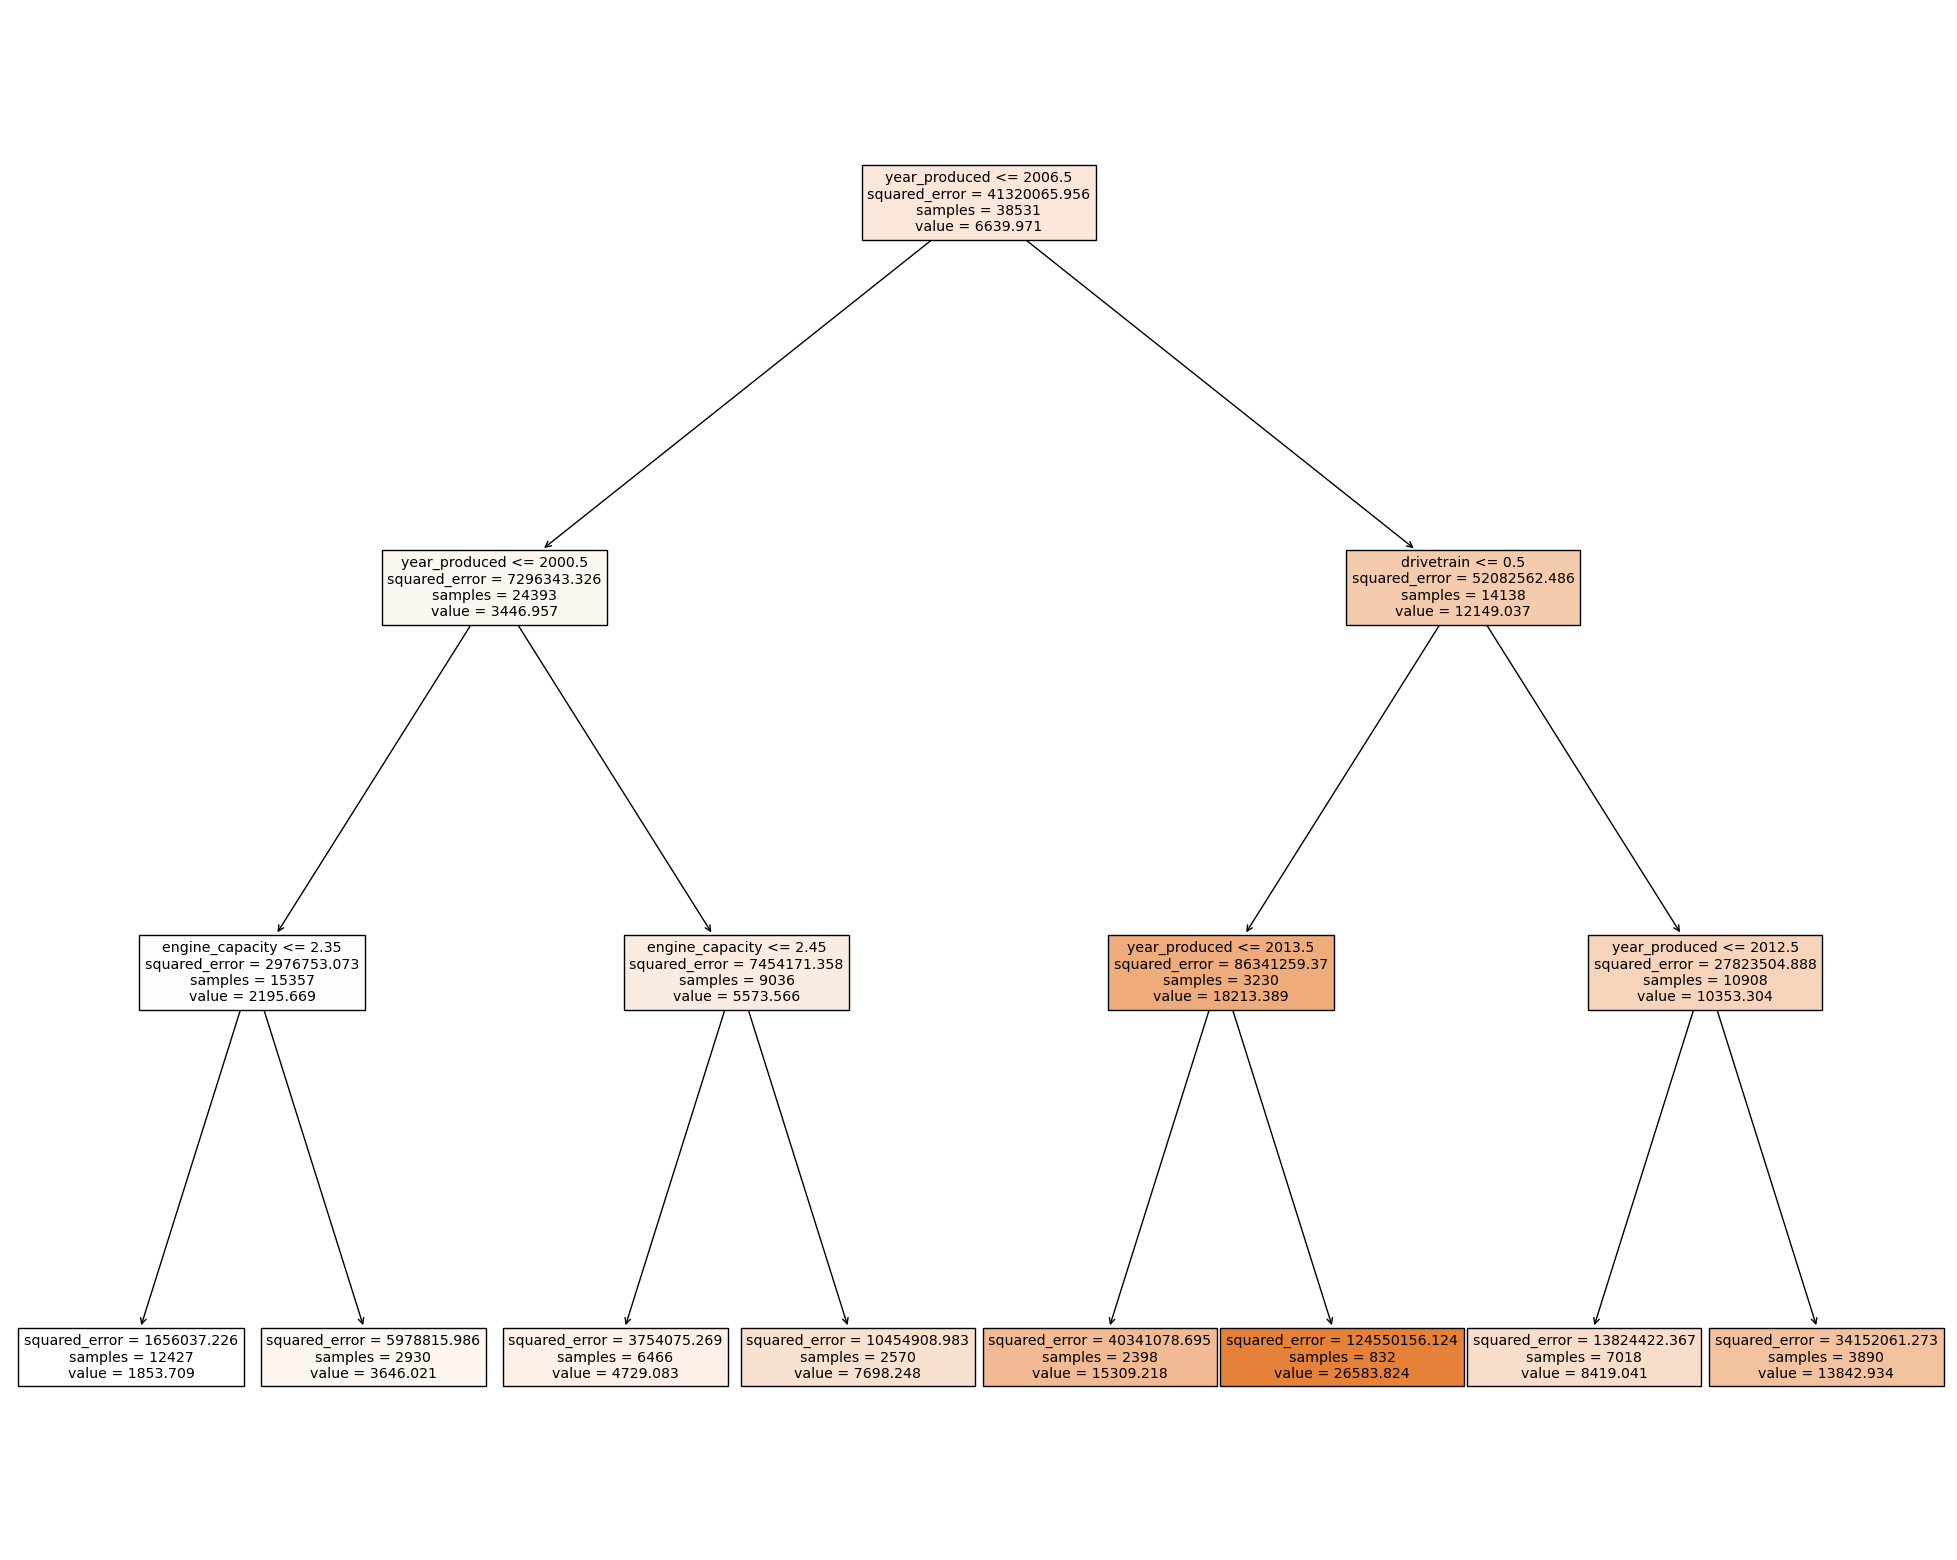

In [14]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(reg, feature_names=features, filled=True)